# Importing and Displaying Recent Weather Data

By Kenneth Burchfiel

Released under the MIT License

This notebook reads in hourly Charlottesville Airport (KCHO) weather data from the National Weather Service; adds that hourly data to an existing copy of hourly data; and then visualizes recent temperature and rainfall reports.

See the Readme stored in this folder for steps on autoamting the process of (1) running this notebook and (2) uploading the executed notebook to Google Colaboratory and/or GitHub.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import plotly.express as px
from IPython.display import Image, HTML
# See https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
import os
import numpy as np
from datetime import datetime, timedelta
chart_width = 960
chart_height = 540
chart_scale = 4 

## Reading in weather data for the past 72 hours

The following cell converts the hourly weather data found within Charlottesville's National Weather Service page into a Pandas DataFrame.

In [2]:
station_code = 'KCHO'

In [3]:
today = datetime.today().date()

In [4]:
retrieval_date = str(today) # The date that the current set of 3-day
# weather history data is being retrieved. Note that this date won't
# match the dates for earlier records within this dataset.
retrieval_date


'2025-01-10'

Importing the latest set of hourly observations from the National Weather Service:

In [5]:
df_3day_data = pd.read_html(
    f'https://forecast.weather.gov/data/obhistory/{station_code}.html',
header = 2)[0][:-3]

# read_html returns a list of tables (even though only one table is 
# currently present on this site), so we'll use [0] to access that
# table.
# The final 3 rows are simply a repetition of the header, so I added in
# [:-3] to exclude them from the DataFrame.
# header = 2 specifies that the third row in the DataFrame should be 
# used as a header. (The first two rows' values are mostly duplicates
# of this row's data.)


df_3day_data.tail()

Date Time (est) Wind (mph) Vis. (mi.) Weather Sky Cond. Air Dwpt Max. Min.  \
65   08      00:53    Vrbl  5      10.00    Fair       CLR  25  8.1   30   25   
66   07      23:53    Vrbl  3      10.00    Fair       CLR  25  8.1  NaN  NaN   
67   07      22:53      NW  7      10.00    Fair       CLR  27  8.1  NaN  NaN   
68   07      21:53      NW  5      10.00    Fair       CLR  27    9  NaN  NaN   
69   07      20:53    Vrbl  6      10.00    Fair       CLR  28    9  NaN  NaN   

   Relative Humidity Wind Chill (Â°F) Heat Index (Â°F) altimeter (in)  \
65               48%               20              NaN          30.19   
66               48%              NaN              NaN          30.19   
67               45%               20              NaN          30.19   
68               46%               22              NaN          30.18   
69               44%               22              NaN          30.17   

   sea level (mb) 1 hr 3 hr 6 hr  
65         1022.8  NaN  NaN  NaN  
66         1022.9  NaN  NaN  NaN  
67         1022.6  NaN  NaN  NaN  
68         1022.5  NaN  NaN  NaN  
69         1022.2  NaN  NaN  NaN

The observation time column within this dataset shows the time zone; this will cause issues when daylight savings time begins or ends (as those events will cause the column name to change). To prevent this from causing any issues when combining our latest data with our historical dataset, we'll add this time zone data to a separate column, then rename the original time column to 'Time.'

In [6]:
original_time_col = [
    column for column in df_3day_data.columns if 'Time' in column][0]
original_time_col 

'Time (est)'

In [7]:
tz = original_time_col.split(' (')[1].split(')')[0].upper()
tz

'EST'

In [8]:
df_3day_data.rename(columns={original_time_col:'Time', 'Date':'Day'}, inplace = True)
df_3day_data.insert(2, 'Time Zone', tz)
df_3day_data['Day'] = df_3day_data['Day'].astype('int')
df_3day_data['Data Retrieval Date'] = pd.to_datetime(datetime.today().date())
df_3day_data

Day   Time Time Zone Wind (mph) Vis. (mi.)   Weather Sky Cond.   Air  \
0    10  19:53       EST       S  7      10.00  Overcast    OVC055    30   
1    10  18:53       EST       S  8      10.00  Overcast    OVC065  30.9   
2    10  17:53       EST       S  8      10.00  Overcast    OVC085  30.9   
3    10  16:53       EST       S  6      10.00  Overcast    OVC090  30.9   
4    10  15:53       EST      SE  7      10.00  Overcast    OVC110    32   
..  ...    ...       ...        ...        ...       ...       ...   ...   
65    8  00:53       EST    Vrbl  5      10.00      Fair       CLR    25   
66    7  23:53       EST    Vrbl  3      10.00      Fair       CLR    25   
67    7  22:53       EST      NW  7      10.00      Fair       CLR    27   
68    7  21:53       EST      NW  5      10.00      Fair       CLR    27   
69    7  20:53       EST    Vrbl  6      10.00      Fair       CLR    28   

    Dwpt  Max. Min. Relative Humidity Wind Chill (Â°F) Heat Index (Â°F)  \
0   12.9   NaN  NaN               49%               24              NaN   
1     12  33.1   30               45%               24              NaN   
2     10   NaN  NaN               42%               24              NaN   
3      9   NaN  NaN               40%               26              NaN   
4      7   NaN  NaN               35%               26              NaN   
..   ...   ...  ...               ...              ...              ...   
65   8.1    30   25               48%               20              NaN   
66   8.1   NaN  NaN               48%              NaN              NaN   
67   8.1   NaN  NaN               45%               20              NaN   
68     9   NaN  NaN               46%               22              NaN   
69     9   NaN  NaN               44%               22              NaN   

   altimeter (in) sea level (mb) 1 hr 3 hr 6 hr Data Retrieval Date  
0           29.83         1010.9  NaN  NaN  NaN          2025-01-10  
1           29.88         1012.4  NaN  NaN  NaN          2025-01-10  
2           29.89         1012.6  NaN  NaN  NaN          2025-01-10  
3           29.91         1013.4  NaN  NaN  NaN          2025-01-10  
4           29.91         1013.3  NaN  NaN  NaN          2025-01-10  
..            ...            ...  ...  ...  ...                 ...  
65          30.19         1022.8  NaN  NaN  NaN          2025-01-10  
66          30.19         1022.9  NaN  NaN  NaN          2025-01-10  
67          30.19         1022.6  NaN  NaN  NaN          2025-01-10  
68          30.18         1022.5  NaN  NaN  NaN          2025-01-10  
69          30.17         1022.2  NaN  NaN  NaN          2025-01-10  

[70 rows x 20 columns]

## Determining the year and month of each observation:

The original NWS dataset only shows the day of the month for each row (which is understandable, since it only contains data for the most recent 72 hours; thus, the year and month can easily be inferred). However, because we'll be keeping a historical copy of this data, calculating each observation's corresponding year and month will be crucial for avoiding ambiguous results.

We'll use the following approach to generate a YYYY-MM-DD-formatted 'Date' column for each observation:

1. We'll use the year and month found within our Data Retrieval Date column as a basis for our observation years and months.

2. If the observation day is less than the day within our Data Retrieval Date column, we'll assume that that observation took place within the current month; otherwise, we'll assume it took place during the previous month and thus reduce the observation month by 1. (For instance, an observation day of 5 and a data retrieval day of 6 would indicate that the observation and data retrieval months are the same; meanwhile, an observation day of 31 and a data retrieval day of 2 demonstrates that the observation took place during the previous month.)

3. The previous step will result in an observation month of 0 if data for December was retrieved in January. In this case, we'll decrease the observation year by 1 and switch the observation month to 12. Otherwise, we'll use the data retrieval year as our observation year.

4. Finally, we'll add these observation month and years to the pre-existing observation day column in order to produce a new 'Date' column in YYYY-MM-DD format.

In [9]:
df_3day_data['Data Retrieval Date'] = pd.to_datetime(
    df_3day_data['Data Retrieval Date'])

df_3day_data['Obs_Month'] = np.where(
    df_3day_data['Day'] <= df_3day_data['Data Retrieval Date'].dt.day, 
    df_3day_data['Data Retrieval Date'].dt.month, 
    df_3day_data['Data Retrieval Date'].dt.month -1)

df_3day_data['Obs_Year'] = np.where(
    df_3day_data['Obs_Month'] != 0,
    df_3day_data['Data Retrieval Date'].dt.year, 
    df_3day_data['Data Retrieval Date'].dt.year-1)

df_3day_data['Obs_Month'] = df_3day_data['Obs_Month'].replace(0, 12).copy()

# Creating our Date column:
# Note the use of str.zfill() to add a leading 0 to single-digit
# months and dates (which will make it easier to sort them in 
# chronological order).
df_3day_data.insert(0, 'Date', (
    df_3day_data['Obs_Year'].astype('str') + '-' +
    df_3day_data['Obs_Month'].astype('str').str.zfill(2) + '-' +
    df_3day_data['Day'].astype('str').str.zfill(2)))

# Sorting the dataset chronologically:
df_3day_data.sort_values(['Date', 'Time'], inplace = True)
df_3day_data


Date  Day   Time Time Zone Wind (mph) Vis. (mi.)   Weather  \
69  2025-01-07    7  20:53       EST    Vrbl  6      10.00      Fair   
68  2025-01-07    7  21:53       EST      NW  5      10.00      Fair   
67  2025-01-07    7  22:53       EST      NW  7      10.00      Fair   
66  2025-01-07    7  23:53       EST    Vrbl  3      10.00      Fair   
65  2025-01-08    8  00:53       EST    Vrbl  5      10.00      Fair   
..         ...  ...    ...       ...        ...        ...       ...   
4   2025-01-10   10  15:53       EST      SE  7      10.00  Overcast   
3   2025-01-10   10  16:53       EST       S  6      10.00  Overcast   
2   2025-01-10   10  17:53       EST       S  8      10.00  Overcast   
1   2025-01-10   10  18:53       EST       S  8      10.00  Overcast   
0   2025-01-10   10  19:53       EST       S  7      10.00  Overcast   

   Sky Cond.   Air  Dwpt  Max. Min. Relative Humidity Wind Chill (Â°F)  \
69       CLR    28     9   NaN  NaN               44%               22   
68       CLR    27     9   NaN  NaN               46%               22   
67       CLR    27   8.1   NaN  NaN               45%               20   
66       CLR    25   8.1   NaN  NaN               48%              NaN   
65       CLR    25   8.1    30   25               48%               20   
..       ...   ...   ...   ...  ...               ...              ...   
4     OVC110    32     7   NaN  NaN               35%               26   
3     OVC090  30.9     9   NaN  NaN               40%               26   
2     OVC085  30.9    10   NaN  NaN               42%               24   
1     OVC065  30.9    12  33.1   30               45%               24   
0     OVC055    30  12.9   NaN  NaN               49%               24   

   Heat Index (Â°F) altimeter (in) sea level (mb) 1 hr 3 hr 6 hr  \
69              NaN          30.17         1022.2  NaN  NaN  NaN   
68              NaN          30.18         1022.5  NaN  NaN  NaN   
67              NaN          30.19         1022.6  NaN  NaN  NaN   
66              NaN          30.19         1022.9  NaN  NaN  NaN   
65              NaN          30.19         1022.8  NaN  NaN  NaN   
..              ...            ...            ...  ...  ...  ...   
4               NaN          29.91         1013.3  NaN  NaN  NaN   
3               NaN          29.91         1013.4  NaN  NaN  NaN   
2               NaN          29.89         1012.6  NaN  NaN  NaN   
1               NaN          29.88         1012.4  NaN  NaN  NaN   
0               NaN          29.83         1010.9  NaN  NaN  NaN   

   Data Retrieval Date  Obs_Month  Obs_Year  
69          2025-01-10          1      2025  
68          2025-01-10          1      2025  
67          2025-01-10          1      2025  
66          2025-01-10          1      2025  
65          2025-01-10          1      2025  
..                 ...        ...       ...  
4           2025-01-10          1      2025  
3           2025-01-10          1      2025  
2           2025-01-10          1      2025  
1           2025-01-10          1      2025  
0           2025-01-10          1      2025  

[70 rows x 23 columns]

In [10]:
df_3day_data.to_csv(
    f'recent_weather_output/{station_code}_most_recent_3_day_data.csv', 
    index = False)

## Appending new data within this file to our historical dataset

Our goal here is to add new data found in this file to historical_hourly_data.csv, a historical copy of this 3-day hourly weather dataset, *without* adding duplicate rows to that dataset. This is made more challenging by the fact that the original NWS table includes neither year nor month columns; if it did, we could simply remove rows that share the same year, month, date, and time.

Creating a historical copy of the 3-day dataset for the weather station being evaluated if one does not exist already:

In [11]:
if f'{station_code}_historical_hourly_data.csv' not in os.listdir('recent_weather_output'):
    print("Historical copy of this dataset doesn't yet exist. \
Initializing it as a copy of the 3-day dataset.")
    df_3day_data.to_csv(
        f'recent_weather_output/{station_code}_historical_hourly_data.csv', index = False)
          

In [12]:
df_historical_data = pd.read_csv(
    f'recent_weather_output/{station_code}_historical_hourly_data.csv')   
print(len(df_historical_data))
df_historical_data.head()

1667


Date  Day   Time Time Zone Wind (mph)  Vis. (mi.) Weather Sky Cond.  \
0  2024-10-31   31  02:53       EST       S  7        10.0    Fair       CLR   
1  2024-10-31   31  03:53       EST       S  3        10.0    Fair       CLR   
2  2024-10-31   31  05:53       EST       S  7        10.0    Fair       CLR   
3  2024-10-31   31  06:53       EST       S  6        10.0    Fair       CLR   
4  2024-10-31   31  07:53       EST       S  6        10.0    Fair       CLR   

    Air  Dwpt  Max.  Min. Relative Humidity  Wind Chill (Â°F)  \
0  59.0  55.0   NaN   NaN               87%               NaN   
1  60.1  55.9   NaN   NaN               86%               NaN   
2  57.0  54.0   NaN   NaN               90%               NaN   
3  55.9  54.0   NaN   NaN               93%               NaN   
4  55.0  54.0  61.0  55.0               96%               NaN   

   Heat Index (Â°F)  altimeter (in)  sea level (mb)  1 hr  3 hr  6 hr  \
0               NaN           30.24          1023.5   NaN   NaN   NaN   
1               NaN           30.23          1023.1   NaN   NaN   NaN   
2               NaN           30.23          1023.1   NaN   NaN   NaN   
3               NaN           30.24          1023.5   NaN   NaN   NaN   
4               NaN           30.24          1023.5   NaN   NaN   NaN   

  Data Retrieval Date  Obs_Month  Obs_Year  Hour Station  
0          2024-11-03         10      2024   2.0    KCHO  
1          2024-11-03         10      2024   3.0    KCHO  
2          2024-11-03         10      2024   5.0    KCHO  
3          2024-11-03         10      2024   6.0    KCHO  
4          2024-11-03         10      2024   7.0    KCHO

Recreating df_3day_data by importing the .csv copy of the table that we just created:

(This step may appear unnecessary, but it does help ensure that both this data and that found in df_historical_data will use the same data types.)

In [13]:
df_3day_data = pd.read_csv(f'recent_weather_output/{station_code}_most_recent_3_day_data.csv')
print(len(df_3day_data))
df_3day_data.tail()

70


Date  Day   Time Time Zone Wind (mph)  Vis. (mi.)   Weather  \
65  2025-01-10   10  15:53       EST      SE  7        10.0  Overcast   
66  2025-01-10   10  16:53       EST       S  6        10.0  Overcast   
67  2025-01-10   10  17:53       EST       S  8        10.0  Overcast   
68  2025-01-10   10  18:53       EST       S  8        10.0  Overcast   
69  2025-01-10   10  19:53       EST       S  7        10.0  Overcast   

   Sky Cond.   Air  Dwpt  Max.  Min. Relative Humidity  Wind Chill (Â°F)  \
65    OVC110  32.0   7.0   NaN   NaN               35%              26.0   
66    OVC090  30.9   9.0   NaN   NaN               40%              26.0   
67    OVC085  30.9  10.0   NaN   NaN               42%              24.0   
68    OVC065  30.9  12.0  33.1  30.0               45%              24.0   
69    OVC055  30.0  12.9   NaN   NaN               49%              24.0   

    Heat Index (Â°F)  altimeter (in)  sea level (mb)  1 hr  3 hr  6 hr  \
65               NaN           29.91          1013.3   NaN   NaN   NaN   
66               NaN           29.91          1013.4   NaN   NaN   NaN   
67               NaN           29.89          1012.6   NaN   NaN   NaN   
68               NaN           29.88          1012.4   NaN   NaN   NaN   
69               NaN           29.83          1010.9   NaN   NaN   NaN   

   Data Retrieval Date  Obs_Month  Obs_Year  
65          2025-01-10          1      2025  
66          2025-01-10          1      2025  
67          2025-01-10          1      2025  
68          2025-01-10          1      2025  
69          2025-01-10          1      2025

Combining our previous historical data with our latest dataset from the last 3 days:

In [14]:
df_historical_new = pd.concat([df_historical_data, df_3day_data])
# Removing duplicate Date/Time entries:
df_historical_new.drop_duplicates(
    ['Date', 'Time'], keep = 'last', inplace = True)
# This isn't a perfect approach, as it will likely cause an hour of data
# to get lost when Daylight Savings Time ends.

print(len(df_historical_new))
df_historical_new

1667


Date  Day   Time Time Zone Wind (mph)  Vis. (mi.)   Weather  \
0   2024-10-31   31  02:53       EST       S  7        10.0      Fair   
1   2024-10-31   31  03:53       EST       S  3        10.0      Fair   
2   2024-10-31   31  05:53       EST       S  7        10.0      Fair   
3   2024-10-31   31  06:53       EST       S  6        10.0      Fair   
4   2024-10-31   31  07:53       EST       S  6        10.0      Fair   
..         ...  ...    ...       ...        ...         ...       ...   
65  2025-01-10   10  15:53       EST      SE  7        10.0  Overcast   
66  2025-01-10   10  16:53       EST       S  6        10.0  Overcast   
67  2025-01-10   10  17:53       EST       S  8        10.0  Overcast   
68  2025-01-10   10  18:53       EST       S  8        10.0  Overcast   
69  2025-01-10   10  19:53       EST       S  7        10.0  Overcast   

   Sky Cond.   Air  Dwpt  Max.  Min. Relative Humidity  Wind Chill (Â°F)  \
0        CLR  59.0  55.0   NaN   NaN               87%               NaN   
1        CLR  60.1  55.9   NaN   NaN               86%               NaN   
2        CLR  57.0  54.0   NaN   NaN               90%               NaN   
3        CLR  55.9  54.0   NaN   NaN               93%               NaN   
4        CLR  55.0  54.0  61.0  55.0               96%               NaN   
..       ...   ...   ...   ...   ...               ...               ...   
65    OVC110  32.0   7.0   NaN   NaN               35%              26.0   
66    OVC090  30.9   9.0   NaN   NaN               40%              26.0   
67    OVC085  30.9  10.0   NaN   NaN               42%              24.0   
68    OVC065  30.9  12.0  33.1  30.0               45%              24.0   
69    OVC055  30.0  12.9   NaN   NaN               49%              24.0   

    Heat Index (Â°F)  altimeter (in)  sea level (mb)  1 hr  3 hr  6 hr  \
0                NaN           30.24          1023.5   NaN   NaN   NaN   
1                NaN           30.23          1023.1   NaN   NaN   NaN   
2                NaN           30.23          1023.1   NaN   NaN   NaN   
3                NaN           30.24          1023.5   NaN   NaN   NaN   
4                NaN           30.24          1023.5   NaN   NaN   NaN   
..               ...             ...             ...   ...   ...   ...   
65               NaN           29.91          1013.3   NaN   NaN   NaN   
66               NaN           29.91          1013.4   NaN   NaN   NaN   
67               NaN           29.89          1012.6   NaN   NaN   NaN   
68               NaN           29.88          1012.4   NaN   NaN   NaN   
69               NaN           29.83          1010.9   NaN   NaN   NaN   

   Data Retrieval Date  Obs_Month  Obs_Year  Hour Station  
0           2024-11-03         10      2024   2.0    KCHO  
1           2024-11-03         10      2024   3.0    KCHO  
2           2024-11-03         10      2024   5.0    KCHO  
3           2024-11-03         10      2024   6.0    KCHO  
4           2024-11-03         10      2024   7.0    KCHO  
..                 ...        ...       ...   ...     ...  
65          2025-01-10          1      2025   NaN     NaN  
66          2025-01-10          1      2025   NaN     NaN  
67          2025-01-10          1      2025   NaN     NaN  
68          2025-01-10          1      2025   NaN     NaN  
69          2025-01-10          1      2025   NaN     NaN  

[1667 rows x 25 columns]

In [15]:
# Saving this updated copy of df_historical_new to a .csv file:
df_historical_new.to_csv(f'recent_weather_output/{station_code}_historical_hourly_data.csv',
                        index = False)
df_historical_new.tail()

Date  Day   Time Time Zone Wind (mph)  Vis. (mi.)   Weather  \
65  2025-01-10   10  15:53       EST      SE  7        10.0  Overcast   
66  2025-01-10   10  16:53       EST       S  6        10.0  Overcast   
67  2025-01-10   10  17:53       EST       S  8        10.0  Overcast   
68  2025-01-10   10  18:53       EST       S  8        10.0  Overcast   
69  2025-01-10   10  19:53       EST       S  7        10.0  Overcast   

   Sky Cond.   Air  Dwpt  Max.  Min. Relative Humidity  Wind Chill (Â°F)  \
65    OVC110  32.0   7.0   NaN   NaN               35%              26.0   
66    OVC090  30.9   9.0   NaN   NaN               40%              26.0   
67    OVC085  30.9  10.0   NaN   NaN               42%              24.0   
68    OVC065  30.9  12.0  33.1  30.0               45%              24.0   
69    OVC055  30.0  12.9   NaN   NaN               49%              24.0   

    Heat Index (Â°F)  altimeter (in)  sea level (mb)  1 hr  3 hr  6 hr  \
65               NaN           29.91          1013.3   NaN   NaN   NaN   
66               NaN           29.91          1013.4   NaN   NaN   NaN   
67               NaN           29.89          1012.6   NaN   NaN   NaN   
68               NaN           29.88          1012.4   NaN   NaN   NaN   
69               NaN           29.83          1010.9   NaN   NaN   NaN   

   Data Retrieval Date  Obs_Month  Obs_Year  Hour Station  
65          2025-01-10          1      2025   NaN     NaN  
66          2025-01-10          1      2025   NaN     NaN  
67          2025-01-10          1      2025   NaN     NaN  
68          2025-01-10          1      2025   NaN     NaN  
69          2025-01-10          1      2025   NaN     NaN

## Making further updates to this combined dataset:

In [16]:
# Removing percentages from Relative Humidity column so that these
# values can be converted to floats:

df_historical_new['Relative Humidity'] = df_historical_new[
'Relative Humidity'].str.replace('%','')

# Converting numerical data in certain columns to floats:

for column in ['Air', 'Dwpt', 'altimeter (in)', 'sea level (mb)',
               '1 hr', '3 hr', '6 hr', 'Relative Humidity']:
    df_historical_new[column] = df_historical_new[column].astype('float')

# Replacing NaN precipitation values with 0s:
for column in ['1 hr', '3 hr', '6 hr']:
    df_historical_new[column] = df_historical_new[column].fillna(0).copy()

df_historical_new.tail()

Date  Day   Time Time Zone Wind (mph)  Vis. (mi.)   Weather  \
65  2025-01-10   10  15:53       EST      SE  7        10.0  Overcast   
66  2025-01-10   10  16:53       EST       S  6        10.0  Overcast   
67  2025-01-10   10  17:53       EST       S  8        10.0  Overcast   
68  2025-01-10   10  18:53       EST       S  8        10.0  Overcast   
69  2025-01-10   10  19:53       EST       S  7        10.0  Overcast   

   Sky Cond.   Air  Dwpt  Max.  Min.  Relative Humidity  Wind Chill (Â°F)  \
65    OVC110  32.0   7.0   NaN   NaN               35.0              26.0   
66    OVC090  30.9   9.0   NaN   NaN               40.0              26.0   
67    OVC085  30.9  10.0   NaN   NaN               42.0              24.0   
68    OVC065  30.9  12.0  33.1  30.0               45.0              24.0   
69    OVC055  30.0  12.9   NaN   NaN               49.0              24.0   

    Heat Index (Â°F)  altimeter (in)  sea level (mb)  1 hr  3 hr  6 hr  \
65               NaN           29.91          1013.3   0.0   0.0   0.0   
66               NaN           29.91          1013.4   0.0   0.0   0.0   
67               NaN           29.89          1012.6   0.0   0.0   0.0   
68               NaN           29.88          1012.4   0.0   0.0   0.0   
69               NaN           29.83          1010.9   0.0   0.0   0.0   

   Data Retrieval Date  Obs_Month  Obs_Year  Hour Station  
65          2025-01-10          1      2025   NaN     NaN  
66          2025-01-10          1      2025   NaN     NaN  
67          2025-01-10          1      2025   NaN     NaN  
68          2025-01-10          1      2025   NaN     NaN  
69          2025-01-10          1      2025   NaN     NaN

In [17]:
# Adding 'Precip' prefixes to the hourly precipitation rows; making the 
# temperature and dew point column names more intuitive; and removing
# time zone data from the Time field:
df_historical_new.rename(columns = {
    '1 hr':'1-Hour Precip',
    '3 hr':'3-Hour Precip',
    '6 hr':'6-Hour Precip',
    'Air':'Temp',
    'Dwpt':'Dew Point',
original_time_col:'Time'},
     inplace = True)

# Sorting the table in chronological order so that our charts will
# be easier to interpret:

df_historical_new.sort_values(['Date', 'Time'], inplace = True)
df_historical_new.reset_index(drop=True,inplace=True)

# Adding columns that show cumulative precipitation totals for various
# periods: (These all update every hour unlike the built-in
# NWS hourly precipitation totals. However, they're also 
# susceptible to errors caused by missing rows.)
for hourly_interval in [3, 6, 12, 24]:
    df_historical_new[f'Rolling {hourly_interval}-Hour Precip'] = (
        df_historical_new['1-Hour Precip'].rolling(
            window=hourly_interval).sum())


# Removing the 6-hour max and min temperature columns in order to 
# simplify the table:
df_historical_new.drop(['Max.', 'Min.'], axis = 1, inplace = True)

# Adding a Date/Time column for graphing purposes:
df_historical_new.insert(
    2, 'Date/Time', df_historical_new['Date'].astype('str') 
    + ' ' + df_historical_new['Time'].astype('str'))


df_historical_new.tail()

Date  Day         Date/Time   Time Time Zone Wind (mph)  \
1662  2025-01-10   10  2025-01-10 15:53  15:53       EST      SE  7   
1663  2025-01-10   10  2025-01-10 16:53  16:53       EST       S  6   
1664  2025-01-10   10  2025-01-10 17:53  17:53       EST       S  8   
1665  2025-01-10   10  2025-01-10 18:53  18:53       EST       S  8   
1666  2025-01-10   10  2025-01-10 19:53  19:53       EST       S  7   

      Vis. (mi.)   Weather Sky Cond.  Temp  Dew Point  Relative Humidity  \
1662        10.0  Overcast    OVC110  32.0        7.0               35.0   
1663        10.0  Overcast    OVC090  30.9        9.0               40.0   
1664        10.0  Overcast    OVC085  30.9       10.0               42.0   
1665        10.0  Overcast    OVC065  30.9       12.0               45.0   
1666        10.0  Overcast    OVC055  30.0       12.9               49.0   

      Wind Chill (Â°F)  Heat Index (Â°F)  altimeter (in)  sea level (mb)  \
1662              26.0               NaN           29.91          1013.3   
1663              26.0               NaN           29.91          1013.4   
1664              24.0               NaN           29.89          1012.6   
1665              24.0               NaN           29.88          1012.4   
1666              24.0               NaN           29.83          1010.9   

      1-Hour Precip  3-Hour Precip  6-Hour Precip Data Retrieval Date  \
1662            0.0            0.0            0.0          2025-01-10   
1663            0.0            0.0            0.0          2025-01-10   
1664            0.0            0.0            0.0          2025-01-10   
1665            0.0            0.0            0.0          2025-01-10   
1666            0.0            0.0            0.0          2025-01-10   

      Obs_Month  Obs_Year  Hour Station  Rolling 3-Hour Precip  \
1662          1      2025   NaN     NaN                    0.0   
1663          1      2025   NaN     NaN                    0.0   
1664          1      2025   NaN     NaN                    0.0   
1665          1      2025   NaN     NaN                    0.0   
1666          1      2025   NaN     NaN                    0.0   

      Rolling 6-Hour Precip  Rolling 12-Hour Precip  Rolling 24-Hour Precip  
1662                    0.0                     0.0                     0.0  
1663                    0.0                     0.0                     0.0  
1664                    0.0                     0.0                     0.0  
1665                    0.0                     0.0                     0.0  
1666                    0.0                     0.0                     0.0

## Creating visualizations:

Note: these visualizations will show only the most recent 1,000 hours (e.g. the latest 41 days and 16 hours, assuming no entries were missing from the original dataset) in order to prevent the charts from getting too busy.

In [18]:
df_historical_new_for_graphing = df_historical_new.iloc[-1000:].copy()
df_historical_new_for_graphing

Date  Day         Date/Time   Time Time Zone    Wind (mph)  \
667   2024-11-29   29  2024-11-29 08:53  08:53       EST         S  12   
668   2024-11-29   29  2024-11-29 09:53  09:53       EST         S  10   
669   2024-11-29   29  2024-11-29 10:53  10:53       EST         S  12   
670   2024-11-29   29  2024-11-29 11:53  11:53       EST  SW  13  G 22   
671   2024-11-29   29  2024-11-29 12:53  12:53       EST         W  10   
...          ...  ...               ...    ...       ...           ...   
1662  2025-01-10   10  2025-01-10 15:53  15:53       EST         SE  7   
1663  2025-01-10   10  2025-01-10 16:53  16:53       EST          S  6   
1664  2025-01-10   10  2025-01-10 17:53  17:53       EST          S  8   
1665  2025-01-10   10  2025-01-10 18:53  18:53       EST          S  8   
1666  2025-01-10   10  2025-01-10 19:53  19:53       EST          S  7   

      Vis. (mi.)   Weather      Sky Cond.  Temp  Dew Point  Relative Humidity  \
667         10.0  Overcast         OVC055  41.0       28.0               60.0   
668         10.0  Overcast         OVC060  43.0       28.0               56.0   
669         10.0  Overcast         OVC060  45.0       28.9               54.0   
670         10.0  Overcast         OVC065  45.0       26.1               48.0   
671         10.0  Overcast  BKN047 OVC055  45.0       26.1               48.0   
...          ...       ...            ...   ...        ...                ...   
1662        10.0  Overcast         OVC110  32.0        7.0               35.0   
1663        10.0  Overcast         OVC090  30.9        9.0               40.0   
1664        10.0  Overcast         OVC085  30.9       10.0               42.0   
1665        10.0  Overcast         OVC065  30.9       12.0               45.0   
1666        10.0  Overcast         OVC055  30.0       12.9               49.0   

      Wind Chill (Â°F)  Heat Index (Â°F)  altimeter (in)  sea level (mb)  \
667               35.0               NaN           30.00          1015.9   
668               38.0               NaN           29.99          1015.7   
669               40.0               NaN           29.98          1015.3   
670               39.0               NaN           29.96          1014.6   
671               40.0               NaN           29.95          1014.3   
...                ...               ...             ...             ...   
1662              26.0               NaN           29.91          1013.3   
1663              26.0               NaN           29.91          1013.4   
1664              24.0               NaN           29.89          1012.6   
1665              24.0               NaN           29.88          1012.4   
1666              24.0               NaN           29.83          1010.9   

      1-Hour Precip  3-Hour Precip  6-Hour Precip Data Retrieval Date  \
667             0.0            0.0            0.0          2024-12-02   
668             0.0            0.0            0.0          2024-12-02   
669             0.0            0.0            0.0          2024-12-02   
670             0.0            0.0            0.0          2024-12-02   
671             0.0            0.0            0.0          2024-12-02   
...             ...            ...            ...                 ...   
1662            0.0            0.0            0.0          2025-01-10   
1663            0.0            0.0            0.0          2025-01-10   
1664            0.0            0.0            0.0          2025-01-10   
1665            0.0            0.0            0.0          2025-01-10   
1666            0.0            0.0            0.0          2025-01-10   

      Obs_Month  Obs_Year  Hour Station  Rolling 3-Hour Precip  \
667          11      2024   8.0    KCHO                    0.0   
668          11      2024   9.0    KCHO                    0.0   
669          11      2024  10.0    KCHO                    0.0   
670          11      2024  11.0    KCHO                    0.0   
671          11      2024  12.

### Graphing temperature and dew point data:

In [19]:
fig_temp = px.line(
    df_historical_new_for_graphing, x = 'Date/Time', y = ['Temp', 'Dew Point'],
       title = f'{station_code} Temperature and \
Dew Point')
fig_temp.update_layout(yaxis_title = 'Degrees (F)')

try:
    fig_temp.write_image(
        'recent_weather_output/recent_temps.png', 
        width = chart_width, height = chart_height, scale = chart_scale)
except:
    print("Unable to write image to folder. Make sure that \
recent_weather_output directory exists and that kaleido is installed.")
    
fig_temp

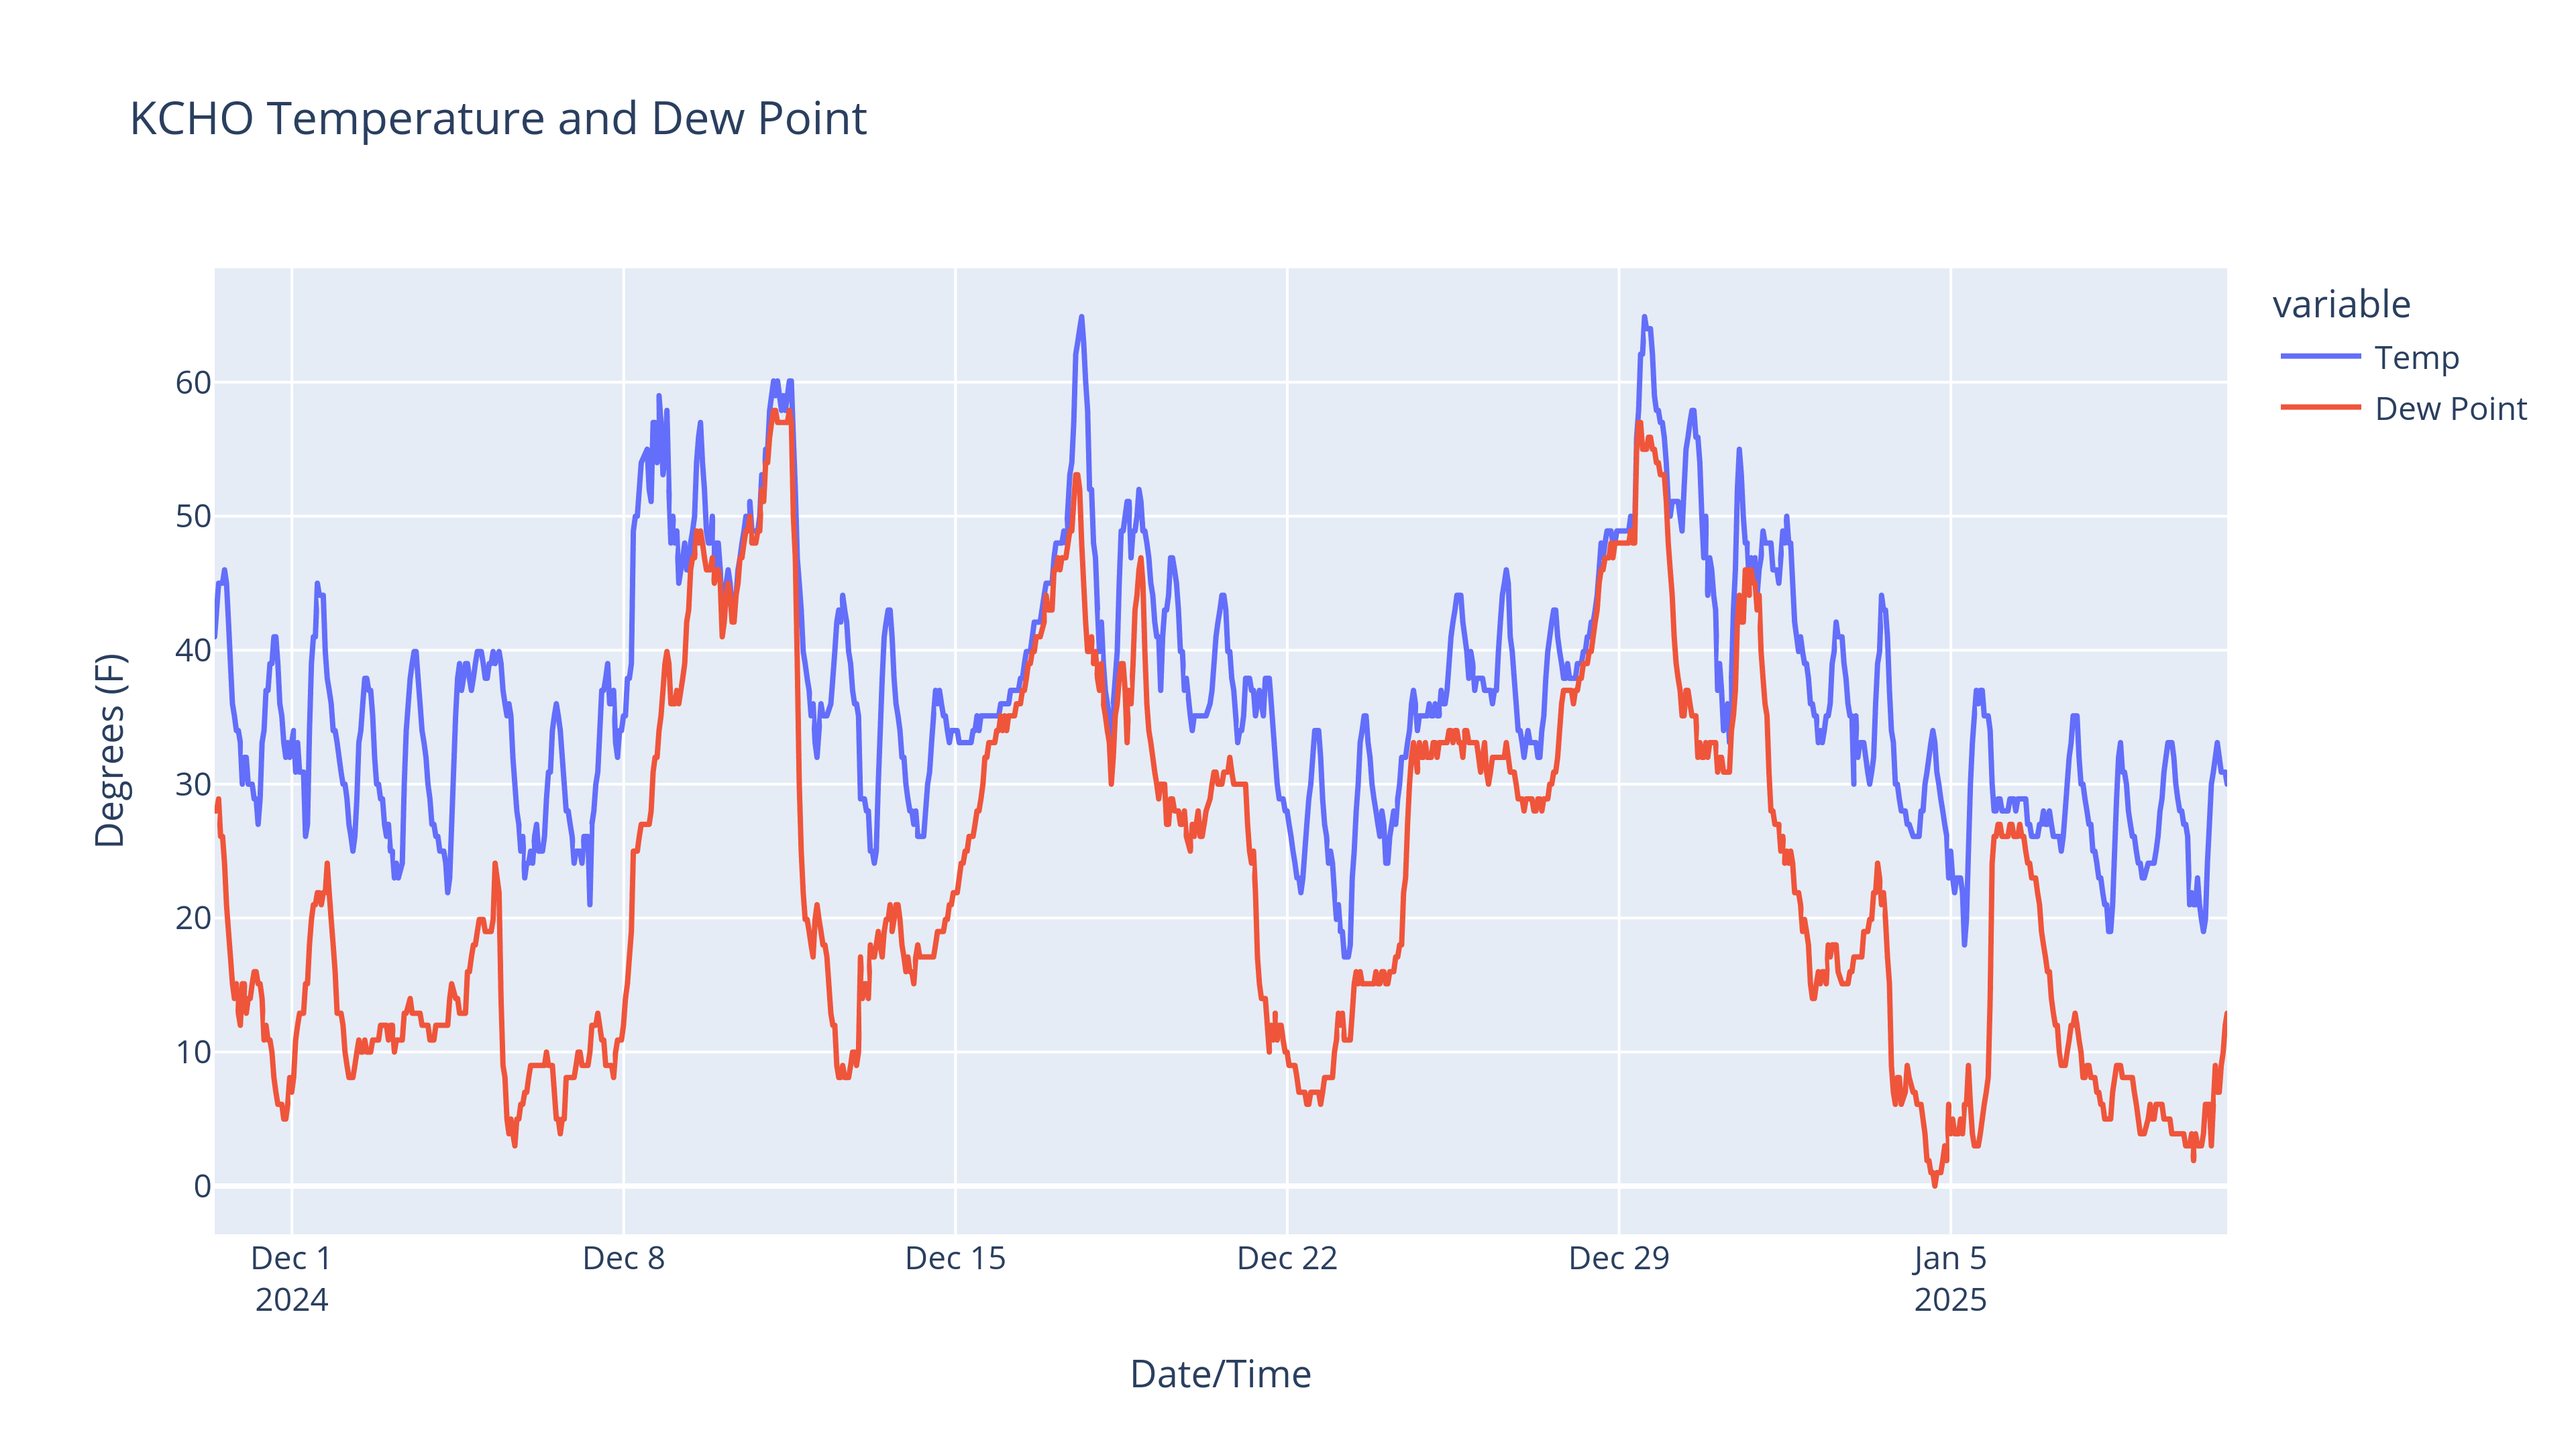

In [20]:
try:
    display(Image('recent_weather_output/recent_temps.png', width = 720))
except:
    print("Unable to read in recent_temps.png from folder.")

### Graphing hourly precipitation data along with rolling precipitation totals:

In [21]:
fig_precip = px.line(df_historical_new_for_graphing, x = 'Date/Time', y = [
    '1-Hour Precip', 'Rolling 3-Hour Precip', 'Rolling 6-Hour Precip',
    'Rolling 12-Hour Precip', 'Rolling 24-Hour Precip'],
       title = f'{station_code} Hourly Precipitation')
fig_precip.update_layout(yaxis_title = 'Precipitation (in.)')
fig_precip.update_xaxes(type='category')
try:
    fig_precip.write_image(
        'recent_weather_output/recent_precip.png', 
        width = chart_width, height = chart_height, scale = chart_scale)
except:
    print("Unable to write image to folder. Make sure that \
recent_weather_output directory exists and that kaleido is installed.")
fig_precip.show()

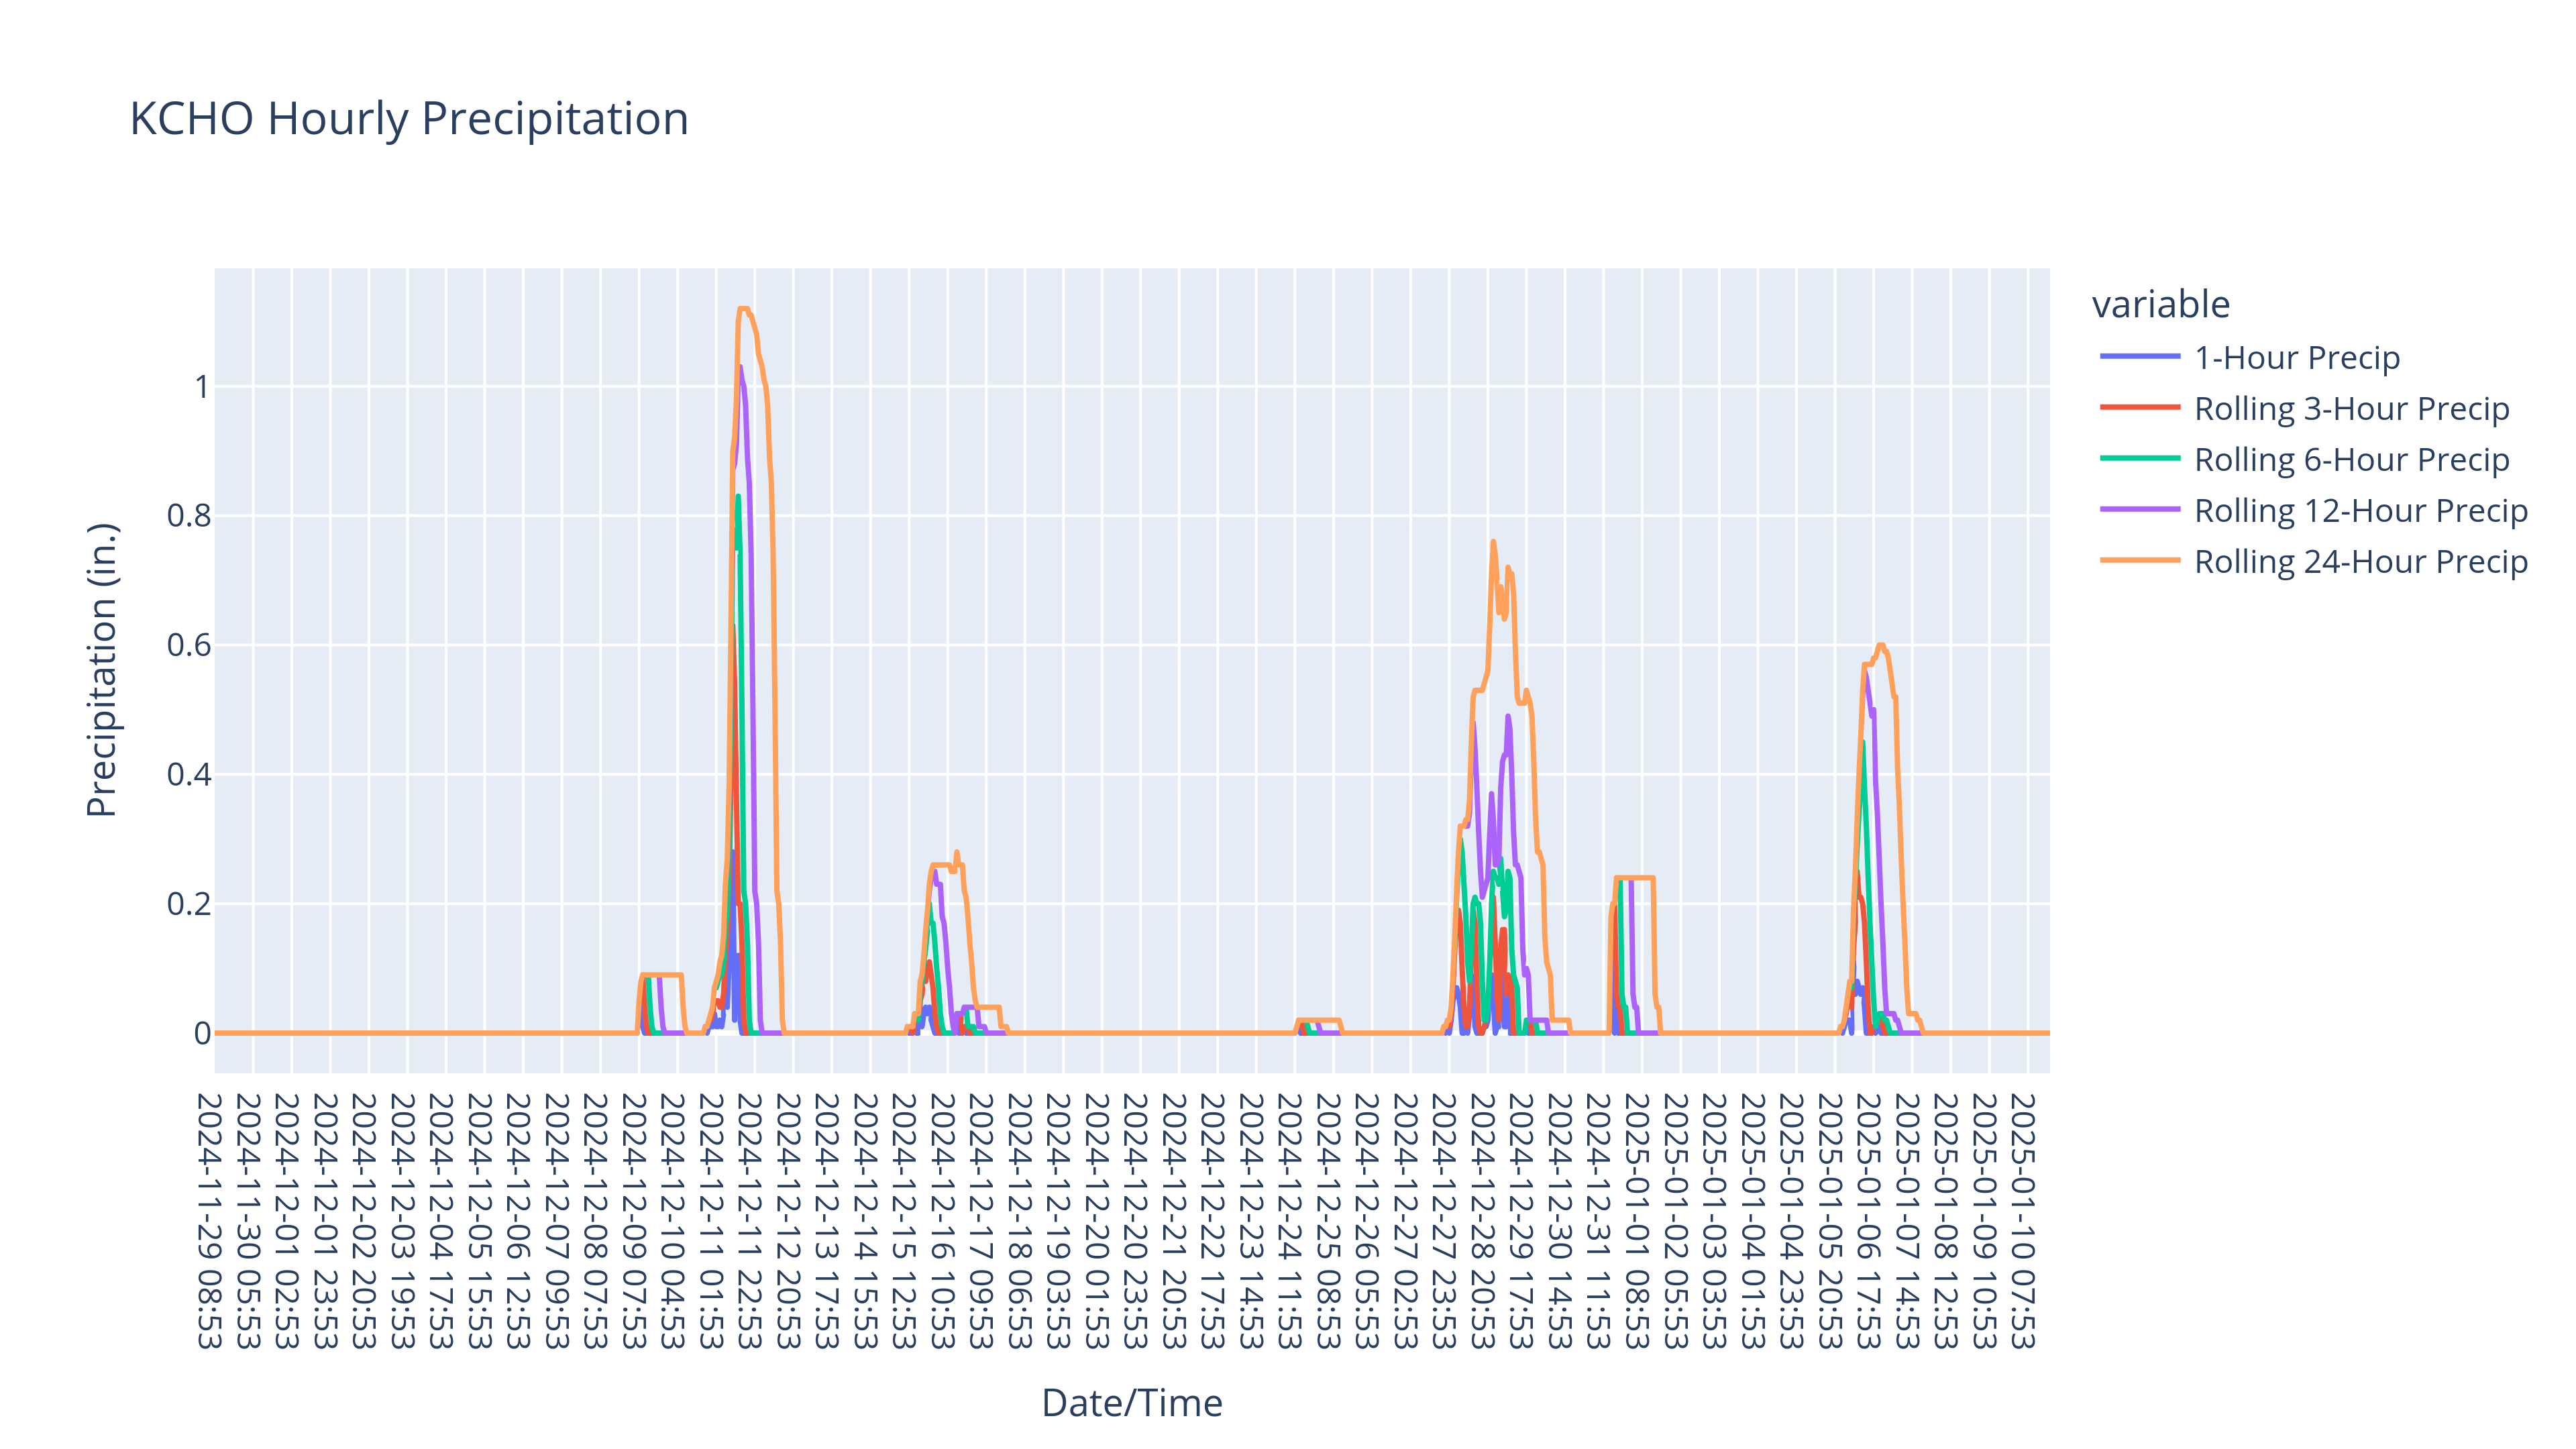

In [24]:
try:
    display(Image('recent_weather_output/recent_precip.png', width = 720))
except:
    print("Unable to read in recent_precip.png from folder.")

## Displaying the last 100 rows of weather data used within the script:

This cell will also display the latest reports at the top of the table so that the reader doesn't have to scroll down in order to see them.

In [22]:
pd.set_option('display.max_rows', 100)
df_historical_new.iloc[-100:].sort_values('Date/Time', ascending = False)

Date  Day         Date/Time   Time Time Zone     Wind (mph)  \
1666  2025-01-10   10  2025-01-10 19:53  19:53       EST           S  7   
1665  2025-01-10   10  2025-01-10 18:53  18:53       EST           S  8   
1664  2025-01-10   10  2025-01-10 17:53  17:53       EST           S  8   
1663  2025-01-10   10  2025-01-10 16:53  16:53       EST           S  6   
1662  2025-01-10   10  2025-01-10 15:53  15:53       EST          SE  7   
1661  2025-01-10   10  2025-01-10 14:53  14:53       EST           S  6   
1660  2025-01-10   10  2025-01-10 13:53  13:53       EST           S  6   
1659  2025-01-10   10  2025-01-10 12:53  12:53       EST           S  5   
1658  2025-01-10   10  2025-01-10 11:53  11:53       EST           Calm   
1657  2025-01-10   10  2025-01-10 10:53  10:53       EST           Calm   
1656  2025-01-10   10  2025-01-10 09:53  09:53       EST           Calm   
1655  2025-01-10   10  2025-01-10 08:53  08:53       EST           Calm   
1654  2025-01-10   10  2025-01-10 07:53  07:53       EST           Calm   
1653  2025-01-10   10  2025-01-10 06:53  06:53       EST           Calm   
1652  2025-01-10   10  2025-01-10 05:53  05:53       EST           W  3   
1651  2025-01-10   10  2025-01-10 04:53  04:53       EST           Calm   
1650  2025-01-10   10  2025-01-10 03:53  03:53       EST          SW  5   
1649  2025-01-10   10  2025-01-10 02:53  02:53       EST          SW  3   
1648  2025-01-10   10  2025-01-10 01:53  01:53       EST          SW  3   
1647  2025-01-10   10  2025-01-10 00:53  00:53       EST          SW  3   
1646  2025-01-09    9  2025-01-09 23:53  23:53       EST           W  3   
1645  2025-01-09    9  2025-01-09 22:53  22:53       EST          N  10   
1644  2025-01-09    9  2025-01-09 21:53  21:53       EST    NW  7  G 20   
1643  2025-01-09    9  2025-01-09 20:53  20:53       EST    NW  9  G 21   
1642  2025-01-09    9  2025-01-09 19:53  19:53       EST        Vrbl  5   
1641  2025-01-09    9  2025-01-09 18:53  18:53       EST        Vrbl  6   
1640  2025-01-09    9  2025-01-09 17:53  17:53       EST          NW  8   
1639  2025-01-09    9  2025-01-09 16:53  16:53       EST        Vrbl  3   
1638  2025-01-09    9  2025-01-09 15:53  15:53       EST   NW  10  G 26   
1637  2025-01-09    9  2025-01-09 14:53  14:53       EST   NW  12  G 23   
1636  2025-01-09    9  2025-01-09 13:53  13:53       EST   NW  12  G 21   
1635  2025-01-09    9  2025-01-09 12:53  12:53       EST   NW  14  G 23   
1634  2025-01-09    9  2025-01-09 11:53  11:53       EST    NW  9  G 20   
1633  2025-01-09    9  2025-01-09 10:53  10:53       EST    W  10  G 18   
1632  2025-01-09    9  2025-01-09 09:53  09:53       EST   NW  10  G 21   
1631  2025-01-09    9  2025-01-09 08:53  08:53       EST    NW  9  G 20   
1630  2025-01-09    9  2025-01-09 07:53  07:53       EST          NW  8   
1629  2025-01-09    9  2025-01-09 06:53  06:53       EST  Vrbl  5  G 20   
1628  2025-01-09    9  2025-01-09 05:53  05:53       EST   NW  13  G 23   
1627  2025-01-09    9  2025-01-09 04:53  04:53       EST   NW  10  G 22   
1626  2025-01-09    9  2025-01-09 03:53  03:53       EST          NW  6   
1625  2025-01-09    9  2025-01-09 01:53  01:53       EST        Vrbl  5   
1624  2025-01-09    9  2025-01-09 00:53  00:53       EST          NW  3   
1623  2025-01-08    8  2025-01-08 23:53  23:53       EST        Vrbl  3   
1622  2025-01-08    8  2025-01-08 22:53  22:53       EST           Calm   
1621  2025-01-08    8  2025-01-08 21:53  21:53       EST          NW  6   
1620  2025-01-08    8  2025-01-08 20:53  20:53       EST          NW  7   
1619  2025-01-08    8  2025-01-08 19:53  19:53       EST           W  3   
1618  2025-01-08    8  2025-01-08 18:53  18:53       EST        Vrbl  5   
1617  2025-01-08    8  2025-01-08 17:53  17:53       EST    NW  9  G 18   
1616  2025-01-08    8  2025-01-08 16:53  16:53       EST          NW  7   
1615  2025-01-08    8  2025-01-08 15:53  15:53       EST   NW  10  G 18   
1614  2025-01-08    8  2025-01-08 14:

Printing the time at which the script finished running:

(The script also retrieves the system's time zone, which may differ from that shown within the weather data.)

In [23]:
curr_time = datetime.now()
print(f"The script finished running at \
{curr_time.isoformat(sep = ' ', timespec = 'seconds')} \
{curr_time.astimezone().tzinfo}.")

The script finished running at 2025-01-10 20:49:56 EST.
